# <center> <font color='green'>GRIP :THE SPARKs FOUNDATION</font></center>

# <center> <font color='green'>Data Science and Business Analytics Intern</font></center>

# <center> <font color='green'>Author: ABHISHEK RAUNIYAR</font></center>

# <center> <font color='green'>Task (3) :OPTIMUM NUMBER OF CLUSTERS</font></center>
In this task we have to predict the optimum number of clusters for given Iris Data set and visualize it.

<center><img src='https://repository-images.githubusercontent.com/158275423/9a32d741-51c7-4573-9799-8d933ee642c6'>

### Table Content
1. [Importing Libarires](#import)

2. [Reading Data Set](#rea)
3. [Find optimum number of cluster using ELBOW Method](#elb)
4. [Dimensional Reduction to 2D](#pca)
5. [Visualizing The Cluster ](#visu)


# STEP:1 Importing Libraries<a class='anchor' id='import'></a>

In [1]:
# for handling warnings
import warnings
warnings.filterwarnings('ignore')

## standard libarires
import numpy as np
import pandas as pd

##for visualization
import seaborn as sng
import matplotlib.pyplot as plt
 
## For Dimension Reduction 
from sklearn.decomposition import PCA

## For Cluster Formation 
from sklearn.cluster import KMeans


    

# STEP:2 Reading Data Set<a class='anchor' id='rea'></a>

In [2]:
### Read the data set.
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
### to find the no of rows and column of data set
print('Shape of the data-set is:',df.shape)

Shape of the data-set is: (150, 6)


In [4]:
### Find the name of each column in given data set.
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# To find  the information of data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Checking the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### In given data set there is no null value.

In [7]:
### Find the name of different item in species column.
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.iloc[:,:-1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


# STEP:3 Find optimum number of cluster using ELBOW Method<a class='anchor' id='elb'></a>

In [9]:
### Creating empty list name as wcss
wcss=[]

## Here we go through 10 cluster beacuse wcss() is decreases from cluster 1 to so on.
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df.iloc[:,1:-1])
    wcss.append(km.inertia_)

In [10]:
## Here we print the value of wcss and we saw wcss decrease from cluster 1 to so on.
wcss

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.34492380952381,
 46.535582051282056,
 39.197082928891625,
 34.421947665056365,
 29.993700643559336,
 27.91846907272295,
 26.111747007894063]

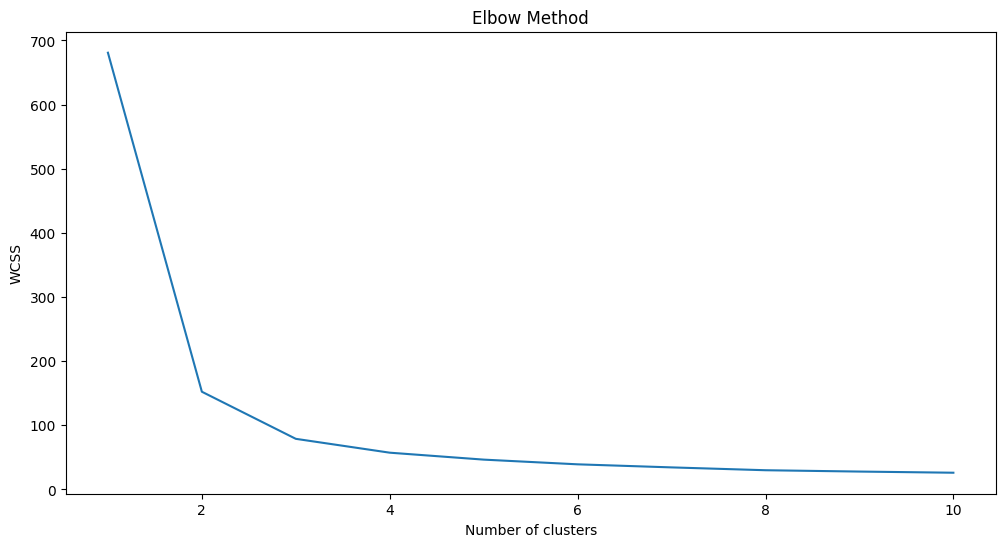

In [11]:
### Here we visualize the decreases value of wcss with cluster and we find the point where elbow occurs.
plt.figure(figsize=(12,6))
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.plot(range(1,11),wcss)
plt.show()

Here by elbow method we get elbow occurs at 3.This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.


Thus optimum number of cluster is 3.

# STEP:4 Dimensional Reduction to 2D<a class='anchor' id='pca'></a>

Here we reduce the dimension of given data-set to 2D .Thus each parameter have its contribution in cluster formation.

In [12]:
### Applying PCA to the data set
x=df.iloc[:,1:-1].values
pca=PCA(n_components=2).fit(x).transform(x)

# STEP:5 Visualization<a class='anchor' id='visu'></a>

In [13]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km=KMeans(n_clusters=3,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_means=km.fit_predict(pca)


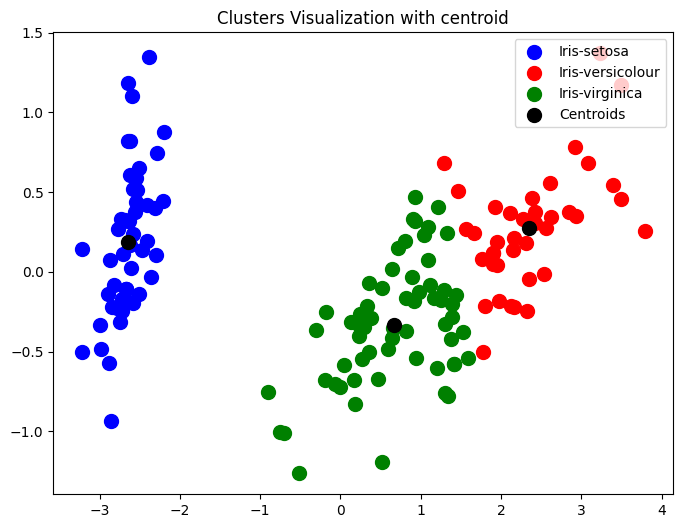

In [14]:
###Visualization of the clusters
plt.figure(figsize=(8,6))
plt.title("Clusters Visualization with centroid")
plt.scatter(pca[y_means==0,0],pca[y_means==0,1],s=100,color='blue',label = 'Iris-setosa')
plt.scatter(pca[y_means==1,0],pca[y_means==1,1],s=100,color='red',label = 'Iris-versicolour')
plt.scatter(pca[y_means==2,0],pca[y_means==2,1],s=100,color='green', label = 'Iris-virginica')

##Plotting the centroid of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend(loc='upper right')
plt.show()
